In [20]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [129]:
def scale (x_train , x_test , test , column):
    scaler = StandardScaler()

    x_train[column] = scaler.fit_transform(x_train[[column]])
    x_test[column] = scaler.transform(x_test[[column]])
    test[column] = scaler.transform(test[[column]])
    
    return x_train , x_test , test

In [130]:
def encode (x_train , x_test , test , column):
    encoder = OneHotEncoder(sparse = False , handle_unknown = 'ignore')
    encoder_x_train = encoder.fit_transform (x_train[[column]])
    encoder_x_test = encoder.transform (x_test[[column]])
    encoder_test = encoder.transform (test[[column]])

    encoder_x_train_df = pd.DataFrame(encoder_x_train, columns=encoder.get_feature_names_out([column]))
    encoder_x_test_df = pd.DataFrame(encoder_x_test, columns=encoder.get_feature_names_out([column]))
    encoder_test_df = pd.DataFrame(encoder_test, columns=encoder.get_feature_names_out([column]))

    x_train = pd.concat([x_train.drop(column, axis=1),encoder_x_train_df], axis=1)
    x_test = pd.concat([x_test.drop(column, axis=1), encoder_x_test_df], axis=1)
    test = pd.concat([test.drop(column, axis=1), encoder_test_df], axis=1)
    return x_train , x_test , test 

In [131]:
def ordinalEncode(x_train , x_test , test , column) :
    x_train[column] = x_train[column].fillna('NA')
    x_test[column] = x_test[column].fillna('NA')
    test[column] = test[column].fillna('NA')
    
    mapping = {'NA': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
    
    x_train[column].replace(mapping, inplace=True)
    x_test[column].replace(mapping, inplace=True)
    test[column].replace(mapping, inplace=True)
    
    
    return x_train , x_test , test 

In [132]:
def impute(x_train , x_test , test , column) :
    imputer = SimpleImputer()
    
    x_train[column] = imputer.fit_transform(x_train[[column]])
    x_test[column] = imputer.transform(x_test[[column]])
    test[column] = imputer.transform(test[[column]])
    
    return x_train , x_test , test 

In [22]:
cwd = os.getcwd()

# Construct the full path to the CSV files
train_path = os.path.join(cwd, '/HousePricePrediction', 'train.csv')
test_path = os.path.join(cwd, 'HousePricePrediction', 'test.csv')

# Read the CSV files
data = pd.read_csv(train_path)
test = pd.read_csv(test_path)
submission = test[['Id']]

FileNotFoundError: [Errno 2] No such file or directory: 'c:/HousePricePrediction\\train.csv'

In [134]:
data.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
892,893,20,RL,70.0,8414,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2006,WD,Normal,154500
1105,1106,60,RL,98.0,12256,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,325000
413,414,30,RM,56.0,8960,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,115000
522,523,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2006,WD,Normal,159000
1036,1037,20,RL,89.0,12898,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,315500


In [135]:
data = data.drop(['Id' , 'Alley' , 'PoolQC' , 'Fence' , 'MiscFeature' , 'MasVnrType' , 'FireplaceQu' , 'MasVnrArea' , 'GarageQual' , 'GarageCond' , 'PavedDrive' , 'ScreenPorch' , 'EnclosedPorch' , '3SsnPorch' , 'WoodDeckSF' , 'OpenPorchSF' , 'GarageFinish' , 'GarageYrBlt' , 'Functional' , 'GarageType' , 'Electrical' , 'Street' , 'LotShape' , 'LandContour' , 'BsmtExposure' , 'BsmtFinType1' , 'BsmtFinSF1' , 'BsmtFinType2' , 'BsmtFinSF2' , 'BsmtUnfSF' , 'LotConfig' , 'LandSlope' , 'Condition2' , 'RoofStyle' , 'RoofMatl' , 'Exterior1st' , 'Exterior2nd' , 'Foundation' , 'SaleType' , 'SaleCondition' , 'YrSold' , 'MoSold' , 'MiscVal'] , axis = 1)
test = test.drop(['Id' , 'Alley' , 'PoolQC' , 'Fence' , 'MiscFeature' , 'MasVnrType' , 'FireplaceQu' , 'MasVnrArea' , 'GarageQual' , 'GarageCond' , 'PavedDrive' , 'ScreenPorch' , 'EnclosedPorch' , '3SsnPorch' , 'WoodDeckSF' , 'OpenPorchSF' , 'GarageFinish' , 'GarageYrBlt' , 'Functional' , 'GarageType' , 'Electrical' , 'Street' , 'LotShape' , 'LandContour' , 'BsmtExposure' , 'BsmtFinType1' , 'BsmtFinSF1' , 'BsmtFinType2' , 'BsmtFinSF2' , 'BsmtUnfSF' , 'LotConfig' , 'LandSlope' , 'Condition2' , 'RoofStyle' , 'RoofMatl' , 'Exterior1st' , 'Exterior2nd' , 'Foundation' , 'SaleType' , 'SaleCondition' , 'YrSold' , 'MoSold' , 'MiscVal'] , axis = 1)

In [136]:
data.shape

(1460, 38)

In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    1460 non-null   int64  
 1   MSZoning      1460 non-null   object 
 2   LotFrontage   1201 non-null   float64
 3   LotArea       1460 non-null   int64  
 4   Utilities     1460 non-null   object 
 5   Neighborhood  1460 non-null   object 
 6   Condition1    1460 non-null   object 
 7   BldgType      1460 non-null   object 
 8   HouseStyle    1460 non-null   object 
 9   OverallQual   1460 non-null   int64  
 10  OverallCond   1460 non-null   int64  
 11  YearBuilt     1460 non-null   int64  
 12  YearRemodAdd  1460 non-null   int64  
 13  ExterQual     1460 non-null   object 
 14  ExterCond     1460 non-null   object 
 15  BsmtQual      1423 non-null   object 
 16  BsmtCond      1423 non-null   object 
 17  TotalBsmtSF   1460 non-null   int64  
 18  Heating       1460 non-null 

In [138]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 37 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    1459 non-null   int64  
 1   MSZoning      1455 non-null   object 
 2   LotFrontage   1232 non-null   float64
 3   LotArea       1459 non-null   int64  
 4   Utilities     1457 non-null   object 
 5   Neighborhood  1459 non-null   object 
 6   Condition1    1459 non-null   object 
 7   BldgType      1459 non-null   object 
 8   HouseStyle    1459 non-null   object 
 9   OverallQual   1459 non-null   int64  
 10  OverallCond   1459 non-null   int64  
 11  YearBuilt     1459 non-null   int64  
 12  YearRemodAdd  1459 non-null   int64  
 13  ExterQual     1459 non-null   object 
 14  ExterCond     1459 non-null   object 
 15  BsmtQual      1415 non-null   object 
 16  BsmtCond      1414 non-null   object 
 17  TotalBsmtSF   1458 non-null   float64
 18  Heating       1459 non-null 

In [139]:
x = data.iloc[: , : -1]
y = data.iloc[: , -1]
x

,MSSubClass,MSZoning,LotFrontage,LotArea,Utilities,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,...,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,PoolArea
0,60,RL,65.0,8450,AllPub,CollgCr,Norm,1Fam,2Story,7,...,2,1,3,1,Gd,8,0,2,548,0
1,20,RL,80.0,9600,AllPub,Veenker,Feedr,1Fam,1Story,6,...,2,0,3,1,TA,6,1,2,460,0
2,60,RL,68.0,11250,AllPub,CollgCr,Norm,1Fam,2Story,7,...,2,1,3,1,Gd,6,1,2,608,0
3,70,RL,60.0,9550,AllPub,Crawfor,Norm,1Fam,2Story,7,...,1,0,3,1,Gd,7,1,3,642,0
4,60,RL,84.0,14260,AllPub,NoRidge,Norm,1Fam,2Story,8,...,2,1,4,1,Gd,9,1,3,836,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,AllPub,Gilbert,Norm,1Fam,2Story,6,...,2,1,3,1,TA,7,1,2,460,0
1456,20,RL,85.0,13175,AllPub,NWAmes,Norm,1Fam,1Story,6,...,2,0,3,1,TA,7,2,2,500,0
1457,70,RL,66.0,9042,AllPub,Crawfor,Norm,1Fam,2Story,7,...,2,0,4,1,Gd,9,2,1,252,0
1458,20,RL,68.0,9717,AllPub,NAmes,Norm,1Fam,1Story,5,...,1,0,2,1,Gd,5,0,1,240,0


In [140]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split (x , y , test_size = 0.2 , random_state = 42)

In [141]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1168 entries, 254 to 1126
Data columns (total 37 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    1168 non-null   int64  
 1   MSZoning      1168 non-null   object 
 2   LotFrontage   951 non-null    float64
 3   LotArea       1168 non-null   int64  
 4   Utilities     1168 non-null   object 
 5   Neighborhood  1168 non-null   object 
 6   Condition1    1168 non-null   object 
 7   BldgType      1168 non-null   object 
 8   HouseStyle    1168 non-null   object 
 9   OverallQual   1168 non-null   int64  
 10  OverallCond   1168 non-null   int64  
 11  YearBuilt     1168 non-null   int64  
 12  YearRemodAdd  1168 non-null   int64  
 13  ExterQual     1168 non-null   object 
 14  ExterCond     1168 non-null   object 
 15  BsmtQual      1140 non-null   object 
 16  BsmtCond      1140 non-null   object 
 17  TotalBsmtSF   1168 non-null   int64  
 18  Heating       1168 non-null   o

In [142]:
from sklearn.impute import SimpleImputer
frontage_imputer = SimpleImputer()

/tmp/ipykernel_33/662118007.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['LotFrontage'])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


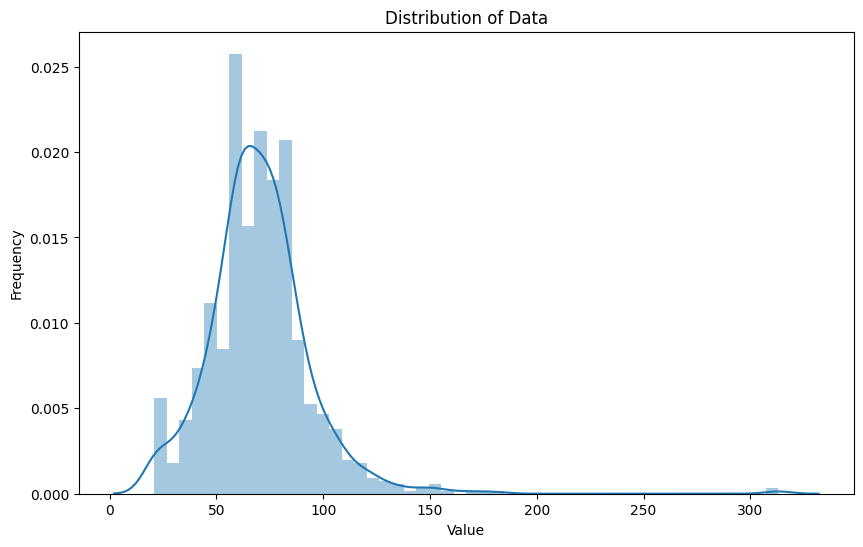

In [143]:
import seaborn as sns 
import matplotlib.pyplot as plt
np.random.seed(42)
plt.figure(figsize=(10, 6))
sns.distplot(x_train['LotFrontage'])
plt.title('Distribution of Data')
plt.xlabel('Value')
plt.ylabel('Frequency')


plt.show()

In [144]:
x_train['LotFrontage'] = frontage_imputer.fit_transform (x_train[['LotFrontage']])
x_test['LotFrontage'] = frontage_imputer.transform (x_test[['LotFrontage']])
test['LotFrontage'] = frontage_imputer.transform (test[['LotFrontage']])

In [145]:
x_train.shape

(1168, 37)

/tmp/ipykernel_33/662118007.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['LotFrontage'])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


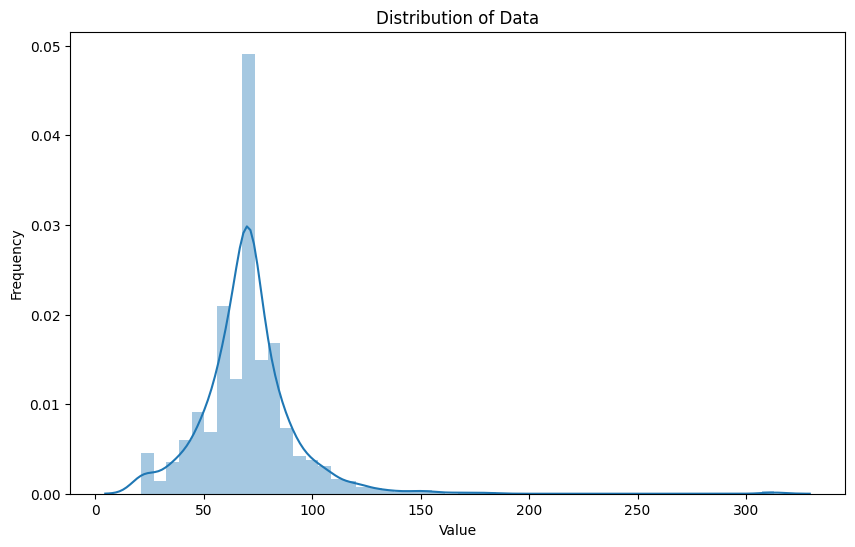

In [146]:
import seaborn as sns 
import matplotlib.pyplot as plt
np.random.seed(42)
plt.figure(figsize=(10, 6))
sns.distplot(x_train['LotFrontage'])
plt.title('Distribution of Data')
plt.xlabel('Value')
plt.ylabel('Frequency')


plt.show()

In [147]:
from sklearn.preprocessing import StandardScaler
frontage_scaler = StandardScaler()

In [148]:
# print(x_train['LotFrontage'].mean())
# x_train['LotFrontage'] = frontage_scaler.fit_transform(x_train[['LotFrontage']])
# x_test['LotFrontage'] = frontage_scaler.transform(x_test[['LotFrontage']])
# test['LotFrontage'] = frontage_scaler.transform(test[['LotFrontage']])
# print(x_train['LotFrontage'].mean())
x_train , x_test , test = scale (x_train , x_test , test , 'LotFrontage')

In [149]:
x_train['LotFrontage'].describe()

count    1.168000e+03
mean    -1.460019e-16
std      1.000428e+00
min     -2.197583e+00
25%     -4.606747e-01
50%      0.000000e+00
75%      3.855113e-01
max      1.080696e+01
Name: LotFrontage, dtype: float64

In [150]:
x_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Utilities,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,...,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,PoolArea
254,20,RL,-0.015314,8400,AllPub,NAmes,Norm,1Fam,1Story,5,...,1,0,3,1,TA,5,0,1,294,0
1066,60,RL,-0.505211,7837,AllPub,Gilbert,Norm,1Fam,2Story,6,...,2,1,3,1,TA,7,1,2,380,0
638,30,RL,-0.148922,8777,AllPub,Edwards,Feedr,1Fam,1Story,5,...,1,0,2,1,TA,4,0,0,0,0
799,50,RL,-0.460675,7200,AllPub,SWISU,Feedr,1Fam,1.5Fin,5,...,1,1,3,1,Gd,7,2,1,240,0
380,50,RL,-0.906036,5000,AllPub,SWISU,Norm,1Fam,1.5Fin,5,...,2,0,3,1,Gd,6,1,1,308,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,20,RL,0.340975,9317,AllPub,CollgCr,Norm,1Fam,1Story,6,...,2,0,3,1,Gd,6,1,2,440,0
1130,50,RL,-0.237994,7804,AllPub,SWISU,Norm,1Fam,1.5Fin,4,...,2,0,4,1,Gd,7,2,2,576,0
1294,20,RL,-0.460675,8172,AllPub,Edwards,Norm,1Fam,1Story,5,...,1,0,2,1,TA,5,0,2,572,0
860,50,RL,-0.683355,7642,AllPub,Crawfor,Norm,1Fam,1.5Fin,7,...,1,1,3,1,Gd,7,1,1,216,0


In [151]:
from sklearn.preprocessing import OneHotEncoder
subClass_ohe = OneHotEncoder(sparse = False ,handle_unknown='ignore')

In [152]:
subClass_encoded_x_train = subClass_ohe.fit_transform(x_train[['MSSubClass']])
subClass_encoded_x_test = subClass_ohe.transform(x_test[['MSSubClass']])
subClass_encoded_test = subClass_ohe.transform(test[['MSSubClass']])

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [153]:
subClass_encoded_x_train_df = pd.DataFrame(subClass_encoded_x_train, columns=subClass_ohe.get_feature_names_out(['MSSubClass']))
subClass_encoded_x_test_df = pd.DataFrame(subClass_encoded_x_test, columns=subClass_ohe.get_feature_names_out(['MSSubClass']))
subClass_encoded_test_df = pd.DataFrame(subClass_encoded_test, columns=subClass_ohe.get_feature_names_out(['MSSubClass']))

In [154]:
x_train = x_train.reset_index(drop=True)
x_test = x_test.reset_index(drop=True)
test = test.reset_index(drop=True)
subClass_encoded_x_train_df = subClass_encoded_x_train_df.reset_index(drop=True)
subClass_encoded_x_test_df = subClass_encoded_x_test_df.reset_index(drop=True)
subClass_encoded_test_df = subClass_encoded_test_df.reset_index(drop=True)

x_train = pd.concat([x_train.drop('MSSubClass', axis=1), subClass_encoded_x_train_df], axis=1)
x_test = pd.concat([x_test.drop('MSSubClass', axis=1), subClass_encoded_x_test_df], axis=1)
test = pd.concat([test.drop('MSSubClass', axis=1), subClass_encoded_test_df], axis=1)



In [155]:
x_train.shape

(1168, 51)

In [156]:
# zoning_ohe = OneHotEncoder(sparse = False , handle_unknown = 'ignore')
# zoning_x_train = zoning_ohe.fit_transform (x_train[['MSZoning']])
# zoning_x_test = zoning_ohe.transform (x_test[['MSZoning']])
# zoning_test = zoning_ohe.transform (test[['MSZoning']])

# zoning_x_train_df = pd.DataFrame(zoning_x_train, columns=zoning_ohe.get_feature_names_out(['MSZoning']))
# zoning_x_test_df = pd.DataFrame(zoning_x_test, columns=zoning_ohe.get_feature_names_out(['MSZoning']))
# zoning_test_df = pd.DataFrame(zoning_test, columns=zoning_ohe.get_feature_names_out(['MSZoning']))

# x_train = pd.concat([x_train.drop('MSZoning', axis=1),zoning_x_train_df ], axis=1)
# x_test = pd.concat([x_test.drop('MSZoning', axis=1), zoning_x_test_df], axis=1)
# test = pd.concat([test.drop('MSZoning', axis=1), zoning_test_df], axis=1)

In [157]:
x_train , x_test , test = encode (x_train , x_test , test , 'MSZoning')

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [158]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 55 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   LotFrontage       1168 non-null   float64
 1   LotArea           1168 non-null   int64  
 2   Utilities         1168 non-null   object 
 3   Neighborhood      1168 non-null   object 
 4   Condition1        1168 non-null   object 
 5   BldgType          1168 non-null   object 
 6   HouseStyle        1168 non-null   object 
 7   OverallQual       1168 non-null   int64  
 8   OverallCond       1168 non-null   int64  
 9   YearBuilt         1168 non-null   int64  
 10  YearRemodAdd      1168 non-null   int64  
 11  ExterQual         1168 non-null   object 
 12  ExterCond         1168 non-null   object 
 13  BsmtQual          1140 non-null   object 
 14  BsmtCond          1140 non-null   object 
 15  TotalBsmtSF       1168 non-null   int64  
 16  Heating           1168 non-null   object 


> **Scaling Lot Area**

In [159]:
x_train , x_test , test = scale (x_train , x_test , test , 'LotArea')

In [160]:
x_train , x_test , test = impute (x_train , x_test , test , 'GarageArea')

In [161]:
x_train , x_test , test = scale (x_train , x_test , test , 'GarageArea')

In [162]:
x_train , x_test , test = impute (x_train , x_test , test , 'GarageCars')

In [163]:
x_train , x_test , test = scale (x_train , x_test , test , 'GarageCars')

In [164]:

x_train['HouseStyle'] = x_train['HouseStyle'].map({'1Story' : 0 , '1.5Unf' : 1 , '1.5Fin' : 2, '2Story' : 3, '2.5Unf' : 4, 'SFoyer' : 5, 'SLvl': 6})
x_test['HouseStyle'] = x_test['HouseStyle'].map({'1Story' : 0 , '1.5Unf' : 1 , '1.5Fin' : 2, '2Story' : 3, '2.5Unf' : 4, 'SFoyer' : 5, 'SLvl': 6})
test['HouseStyle'] = test['HouseStyle'].map({'1Story' : 0 , '1.5Unf' : 1 , '1.5Fin' : 2, '2Story' : 3, '2.5Unf' : 4, 'SFoyer' : 5, 'SLvl': 6})

style_imputer = SimpleImputer(strategy = 'most_frequent')
x_train['HouseStyle'] = style_imputer.fit_transform(x_train[['HouseStyle']]).ravel()
x_test['HouseStyle'] = style_imputer.transform(x_test[['HouseStyle']]).ravel()
test['HouseStyle'] = style_imputer.transform(test[['HouseStyle']]).ravel()

In [165]:
x_train['HouseStyle'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1168 entries, 0 to 1167
Series name: HouseStyle
Non-Null Count  Dtype  
--------------  -----  
1168 non-null   float64
dtypes: float64(1)
memory usage: 9.2 KB


In [166]:
x_train , x_test , test = scale (x_train , x_test , test , 'YearBuilt')

In [167]:
x_train , x_test , test = scale (x_train , x_test , test , 'YearRemodAdd')

In [168]:
x_train['ExterQual'] = x_train['ExterQual'].map({'Po' : 0 , 'Fa' : 1 , 'TA' : 2 , 'Gd' : 3 , 'Ex' : 4})
x_test['ExterQual'] = x_test['ExterQual'].map({'Po' : 0 , 'Fa' : 1 , 'TA' : 2 , 'Gd' : 3 , 'Ex' : 4})
test['ExterQual'] = test['ExterQual'].map({'Po' : 0 , 'Fa' : 1 , 'TA' : 2 , 'Gd' : 3 , 'Ex' : 4})

In [169]:
x_train.shape

(1168, 55)

In [170]:
x_train , x_test , test = ordinalEncode (x_train , x_test , test , 'ExterCond')
x_train , x_test , test = ordinalEncode (x_train , x_test , test , 'BsmtQual')
x_train , x_test , test = ordinalEncode (x_train , x_test , test , 'BsmtCond')

/tmp/ipykernel_33/1339675579.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x_train[column].replace(mapping, inplace=True)
/tmp/ipykernel_33/1339675579.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x_train[column].replace(mapping, inplace=True)
/tmp/ipykernel_33/1339675579.py:9: FutureWar

In [171]:
x_train.shape

(1168, 55)

In [172]:
# heating_ohe = OneHotEncoder(sparse = False , handle_unknown = 'ignore')
# heating_x_train = heating_ohe.fit_transform (x_train[['Heating']])
# heating_x_test = heating_ohe.transform (x_test[['Heating']])
# heating_test = heating_ohe.transform (test[['Heating']])

# heating_x_train_df = pd.DataFrame(heating_x_train, columns=heating_ohe.get_feature_names_out(['Heating']))
# heating_x_test_df = pd.DataFrame(heating_x_test, columns=heating_ohe.get_feature_names_out(['Heating']))
# heating_test_df = pd.DataFrame(heating_test, columns=heating_ohe.get_feature_names_out(['Heating']))

# x_train = pd.concat([x_train.drop('Heating', axis=1),heating_x_train_df ], axis=1)
# x_test = pd.concat([x_test.drop('Heating', axis=1), heating_x_test_df], axis=1)
# test = pd.concat([test.drop('Heating', axis=1), heating_test_df], axis=1)

x_train , x_test , test = encode (x_train , x_test , test , 'Heating')

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [173]:
x_train['HeatingQC'] = x_train['HeatingQC'].map({'Po' : 0 , 'Fa' : 1 , 'TA' : 2 , 'Gd' : 3 , 'Ex' : 4})
x_test['HeatingQC'] = x_test['HeatingQC'].map({'Po' : 0 , 'Fa' : 1 , 'TA' : 2 , 'Gd' : 3 , 'Ex' : 4})
test['HeatingQC'] = test['HeatingQC'].map({'Po' : 0 , 'Fa' : 1 , 'TA' : 2 , 'Gd' : 3 , 'Ex' : 4})

In [174]:
x_train['CentralAir'] = x_train['CentralAir'].map({'N' : 0 , 'Y' : 1})
x_test['CentralAir'] = x_test['CentralAir'].map({'N' : 0 , 'Y' : 1})
test['CentralAir'] = test['CentralAir'].map({'N' : 0 , 'Y' : 1})

In [175]:
x_train['KitchenQual'] = x_train['KitchenQual'].map({'Po' : 0 , 'Fa' : 1 , 'TA' : 2 , 'Gd' : 3 , 'Ex' : 4})
x_test['KitchenQual'] = x_test['KitchenQual'].map({'Po' : 0 , 'Fa' : 1 , 'TA' : 2 , 'Gd' : 3 , 'Ex' : 4})
test['KitchenQual'] = test['KitchenQual'].map({'Po' : 0 , 'Fa' : 1 , 'TA' : 2 , 'Gd' : 3 , 'Ex' : 4})

qual_imputer = SimpleImputer(strategy = 'most_frequent')
x_train['KitchenQual'] = style_imputer.fit_transform(x_train[['KitchenQual']]).ravel()
x_test['KitchenQual'] = style_imputer.transform(x_test[['KitchenQual']]).ravel()
test['KitchenQual'] = style_imputer.transform(test[['KitchenQual']]).ravel()

In [176]:
utility_imputer = SimpleImputer(strategy = 'most_frequent')
x_train['Utilities'] = utility_imputer.fit_transform(x_train[['Utilities']]).ravel()
x_test['Utilities'] = utility_imputer.transform(x_test[['Utilities']]).ravel()
test['Utilities'] = utility_imputer.transform(test[['Utilities']]).ravel()

In [177]:
x_train['Utilities'] = x_train['Utilities'].map({'ELO' : 0 , 'NoSeWa' : 1 , 'NoSewr' : 2 , 'AllPub' : 3})
x_test['Utilities'] = x_test['Utilities'].map({'ELO' : 0 , 'NoSeWa' : 1 , 'NoSewr' : 2 , 'AllPub' : 3})
test['Utilities'] = test['Utilities'].map({'ELO' : 0 , 'NoSeWa' : 1 , 'NoSewr' : 2 , 'AllPub' : 3})

In [178]:
x_train , x_test , test = encode (x_train , x_test , test , 'Neighborhood')

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [179]:
x_train , x_test , test = encode (x_train , x_test , test , 'Condition1')
x_train , x_test , test = encode (x_train , x_test , test , 'BldgType')

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [180]:
x_train , x_test , test = impute (x_train , x_test , test , 'TotalBsmtSF')
x_train , x_test , test = scale (x_train , x_test , test , 'TotalBsmtSF')

In [181]:
x_train , x_test , test = impute (x_train , x_test , test , 'BsmtFullBath')
x_train , x_test , test = impute (x_train , x_test , test , 'BsmtHalfBath')
x_train , x_test , test = scale (x_train , x_test , test , 'BsmtFullBath')
x_train , x_test , test = scale (x_train , x_test , test , 'BsmtHalfBath')

In [182]:
x_train

,LotFrontage,LotArea,Utilities,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,...,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE
0,-0.015314,-0.212896,3,0.0,5,6,-0.455469,-1.346063,2,4,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-0.505211,-0.265245,3,3.0,6,7,0.718609,0.439214,3,3,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,-0.148922,-0.177841,3,0.0,5,7,-1.988293,-1.683818,2,3,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,-0.460675,-0.324474,3,2.0,5,7,-1.107734,-1.683818,2,3,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-0.906036,-0.529035,3,2.0,5,6,-1.531707,-1.683818,2,3,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,0.340975,-0.127631,3,0.0,6,5,1.142582,1.018222,3,3,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1164,-0.237994,-0.268313,3,2.0,4,3,-1.401254,-1.683818,2,3,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1165,-0.460675,-0.234096,3,0.0,5,7,-0.520696,0.246211,2,3,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1166,-0.683355,-0.283376,3,2.0,7,8,-1.727387,0.632217,3,3,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [183]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 96 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   LotFrontage           1459 non-null   float64
 1   LotArea               1459 non-null   float64
 2   Utilities             1459 non-null   int64  
 3   HouseStyle            1459 non-null   int64  
 4   OverallQual           1459 non-null   int64  
 5   OverallCond           1459 non-null   int64  
 6   YearBuilt             1459 non-null   float64
 7   YearRemodAdd          1459 non-null   float64
 8   ExterQual             1459 non-null   int64  
 9   ExterCond             1459 non-null   int64  
 10  BsmtQual              1459 non-null   int64  
 11  BsmtCond              1459 non-null   int64  
 12  TotalBsmtSF           1459 non-null   float64
 13  HeatingQC             1459 non-null   int64  
 14  CentralAir            1459 non-null   int64  
 15  1stFlrSF             

In [184]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [185]:
lr.fit (x_train , y_train)
y_pred = lr.predict(x_test)

In [186]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [187]:
mae = mean_absolute_error(y_test, y_pred)


mse = mean_squared_error(y_test, y_pred)


r2 = r2_score(y_test, y_pred)


In [193]:
print(mae , mse , r2)

20168.461484489377 1085233295.578253 0.8585153660659979


In [189]:
submission['Price'] = lr.predict(test)

In [190]:
submission.head()

,Id,Price
0,1461,100843.499097
1,1462,155225.222533
2,1463,157136.826668
3,1464,172605.103881
4,1465,229713.519688


In [196]:
sample_submission_df = pd.read_csv('../input/house-prices-advanced-regression-techniques/sample_submission.csv')
sample_submission_df['SalePrice'] = lr.predict(test)
sample_submission_df.to_csv('/kaggle/working/submission.csv', index=False)
sample_submission_df.head()

,Id,SalePrice
0,1461,100843.499097
1,1462,155225.222533
2,1463,157136.826668
3,1464,172605.103881
4,1465,229713.519688
